# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Lucas|secret|
|Stefan|secret|
|Mike|secret|
|Thomas|secret|

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [50]:
# !pip install rdflib
# See https://rdflib.readthedocs.io/en/stable/gettingstarted.html
from rdflib import  Graph
import rdflib
import networkx as nx


In [51]:
g=Graph()
g.parse('http://dbpedia.org/resource/Michael_Jackson')



<Graph identifier=Nf7f2585b64ab4edf9c4d3c2358c9eadb (<class 'rdflib.graph.Graph'>)>

In [52]:
triples= [triple for triple in g]
triples[:2], len(triples)

([(rdflib.term.URIRef('http://dbpedia.org/resource/List_of_RPM_number-one_dance_singles_of_1991'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Relax,_Take_It_Easy'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'))],
 9368)

## Familie Graph

### Wat is RDF?
- RDF staat voor Resource Description Framework en is een standaardmodel voor het uitwisselen van gegevens op het internet. In feite is RDF een ‘taal’ waarin feiten kunnen worden opgeslagen. Al deze feiten hebben deze structuur: subject-predicaat-object. Samen vormen deze drie onderdelen een *triple*
- Een voorbeeld van een feit in deze structuur is ‘Amsterdam is de hoofdstad van Nederland’. Het subject is ‘Amsterdam’, het predicaat is ‘hoofdstad van’ en het object is ‘Nederland’.
- In logica zou het er zo uit zien: hoofstad_van(Amsterdam, Nederland).


### Tutorial
In de onderstaande cell is te zien hoe er in simpele termen een *triple* kan worden gemaakt in python.



In [53]:
test = Graph()
test.bind("foaf", rdflib.FOAF)

# 'Kent' relatie
obj = 'bob'
pre = 'kent'
subj = 'mary'

# 'Man/Vrouw' relatie
obj_2 = 'bob'
pre_2 = 'type'
subj_2 = 'M'

obj, pre, subj

('bob', 'kent', 'mary')

### Namespaces
In rdflib moeten elk van de termen van een triple worden omgezet naar rdflib variabelen. Namespaces bevatten vele voorgedefinieerde relaties. In ons geval passen we de relatie "knows" toe uit de FOAF (Friend Of A Friend) namespace, een namespace die handig is voor het beschrijven van eigenschappen van en relaties tussen mensen, aangezien wij een rdf database gaan maken van een familienetwerk bestaande uit mensen en familierelaties.

In [54]:
# Verander obj, relatie en subject naar rdflib objecten:
# 'Kent' relatie
obj = rdflib.Literal(obj)
rel = rdflib.FOAF.knows
subj = rdflib.Literal(subj)

# 'Man/Vrouw' relatie
obj_2 = rdflib.Literal(obj_2)
rel_2 = rdflib.RDF.type
subj_2 = rdflib.Literal(subj_2)

obj, rel, subj

(rdflib.term.Literal('bob'),
 rdflib.term.URIRef('http://xmlns.com/foaf/0.1/knows'),
 rdflib.term.Literal('mary'))

Voor het opzetten van een rdf netwerk met behulp van rdflib moet er een graph worden gedefinieerd. Vervolgens kunnen triples worden opgesteld en kunnen deze direct aan het netwerk (de graph) worden toegevoegd.
Ook kunnen informatiedatabases beschikbaar op het internet in één keer worden toegevoegd aan een rdf graph door middel van de functie *.parse()*. Een voorwaarde hiervoor is wel dat de database een *triple store* is.


In [55]:
# Voeg triple toe aan rdflib.Graph()
test.add((obj, rel, subj))
test.add((obj_2, rel_2, subj_2))

for x in test:
    print(x[0], x[1], x[2])

bob http://www.w3.org/1999/02/22-rdf-syntax-ns#type M
bob http://xmlns.com/foaf/0.1/knows mary


### Queries op een rdf database met Sparql

Vervolgens kunnen er met behulp van Sparql queries op de graph gemaakt worden.  

Predicaatlogische vragen als de onderstaande vraag kunnen worden omgevormd tot een SQL (Sparql) *queery*:

$\forall x \exists y (Knows(x,y))$  
  
wordt dan:  
  
SELECT ?x ?y WHERE {?x foaf:knows ?y}

In [56]:
# Selecteer iedereen die iemand kent
for x in test.query("""SELECT ?x ?y WHERE {?x foaf:knows ?y}"""):
    print(x[0],x[1])

# Selecteer alle mannen
for x in test.query("""SELECT ?x WHERE {?x rdf:type 'M'}"""):
    print(x[0])
    
    

bob mary
bob


In de volgende cell wordt er een networkx familienetwerk gedefinieerd wat is gebruikt in een eerdere opdracht.

In [57]:
import matplotlib.pyplot as plt
import networkx as nx


# Familie Stefan
# Geslacht definitie voor de personen in het netwerk
M = {'Sjaak', 'Koos', 'Ron', 'Remy', 'Stefan', 'Patrick', 'Michael', 'Lester', 'Kenneth', 'Jayden', 'Vince', 'Marcel'}
V = {'Rietje','Fia', 'Monique', 'Brenda', 'Mieke', 'Nicky'}

S = nx.DiGraph()
MS = S.subgraph(S.add_nodes_from(M))
VS = S.subgraph(S.add_nodes_from(V))

for n in M:
    S.nodes[n]['M']=True
    S.nodes[n]['V']=False
for n in V:
    S.nodes[n]['V']=True
    S.nodes[n]['M']=False

# De edges in dit netwerk stellen ouderrelaties voor met het format (ouder, kind).
S.add_edges_from([('Sjaak','Monique'), ('Fia','Monique'),
                  ('Sjaak','Brenda'), ('Fia','Brenda'), 
                  ('Brenda', 'Kenneth'), ('Brenda', 'Lester'), 
                  ('Remy','Kenneth'), ('Remy', 'Lester'), 
                  ('Monique','Stefan'), ('Rietje', 'Ron'), 
                  ('Rietje', 'Mieke'), ('Rietje','Marcel'), 
                  ('Koos', 'Ron'), ('Koos', 'Mieke'), 
                  ('Koos','Marcel'),('Nicky','Vince'),
                  ('Ron', 'Stefan'), ('Ron', 'Patrick'), 
                  ('Ron', 'Michael'), ('Michael', 'Jayden'),
                  ('Michael', 'Vince'), ('Nicky', 'Jayden')])



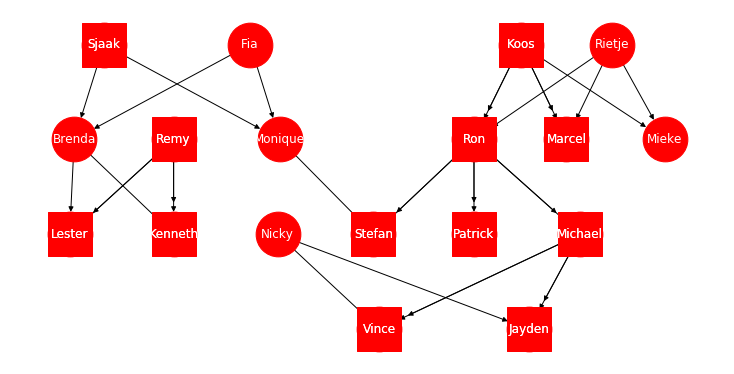

In [58]:
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

plt.figure(figsize=(10,5))
pos = graphviz_layout(S, prog="dot")
nx.draw(MS, pos, with_labels = True, node_size = 2000, node_color = 'red', font_color = 'white', node_shape = 's')
nx.draw(VS, pos, with_labels = True, node_size = 2000, node_color = 'red', font_color = 'white')

### Networkx2RDF
Deze functie neemt een nx.Graph() als input. 
Voor alle nodes in de Graph wordt er geloopt over de atributen van de nodes. De atributen worden toegevoegd aan het rdflib netwerk met de 'RDF:type' relatie. Vervolgens worden de edges aan het rdflib netwerk toegevoegd met de 'FOAF.knows' relatie. Dit representeert de relatie tussen nodes die een edge met elkaar hebben.

In [59]:
# Neemt een nx.Graph() en returnt een rdflib.Graph()
def networkx2RDF(G):
    d = Graph()
    d.bind("foaf", rdflib.FOAF)

    for x in G:
        obj = rdflib.Literal(x)
        
        d.add((obj,rdflib.FOAF.name, rdflib.Literal(obj) ))

        for y in G.nodes[x]:
            subj = y

            if G.nodes[x][y]:
                d.add((obj,rdflib.RDF.type, rdflib.Literal(subj)))

        if G.edges(x):
            for y in G.edges(x):
                subj = y[1]
                d.add((obj,rdflib.FOAF.knows, rdflib.Literal(subj)))
    return d
        
A = networkx2RDF(S)


### Sparql queries op het familienetwerk

In de volgende cell zijn enkele predicaatlogische familierelaties vertaald naar Sparql queries. Vervolgens kunnen we deze queries stellen op het familienetwerk. Om te controleren of de resultaten van de queries kloppen wordt er een dataframe aangemaakt waarin overzichtelijk de familierelaties te zien zijn. Elementen in de dataframe volgen het volgende format: (x, y) betekend x heeft de relatie [kolomnaam] met y.

In [60]:
from collections import defaultdict
import pandas as pd

# Neemt een RDF en returnt de familierelaties in een DF
def Relaties_RDF(RDF):
    a = defaultdict(list)
    rels = ['Vader','Moeder','Broer','Zus','Opa','Oma','Oom','Tante']
    
    Zus = RDF.query("""
    SELECT DISTINCT ?x ?y WHERE {?x rdf:type 'V' . ?z foaf:knows ?x . ?z foaf:knows ?y . FILTER ( ?x != ?y) }
    """)

    Broer = RDF.query("""
    SELECT DISTINCT ?x ?y WHERE {?x rdf:type 'M' . ?z foaf:knows ?x . ?z foaf:knows ?y . FILTER ( ?x != ?y) }
    """)

    Vader = RDF.query("""
    SELECT DISTINCT ?x ?y WHERE {?x rdf:type 'M' . ?x foaf:knows ?y}
    """)

    Moeder = RDF.query("""
    SELECT DISTINCT ?x ?y WHERE {?x rdf:type 'V' . ?x foaf:knows ?y}
    """)

    Opa = RDF.query("""
    SELECT DISTINCT ?x ?y WHERE {?x rdf:type 'M' . ?x foaf:knows ?z . ?z foaf:knows ?y}
    """)

    Oma = RDF.query("""
    SELECT DISTINCT ?x ?y WHERE {?x rdf:type 'V' . ?x foaf:knows ?z . ?z foaf:knows ?y}
    """)

    Oom = RDF.query("""
    SELECT DISTINCT ?x ?y WHERE {?z foaf:knows ?y . ?o foaf:knows ?z . ?o foaf:knows ?x . FILTER(?z != ?x) . ?x rdf:type 'M'}
    """)

    Tante = RDF.query("""
    SELECT DISTINCT ?x ?y WHERE {?z foaf:knows ?y . ?o foaf:knows ?z . ?o foaf:knows ?x . FILTER(?z != ?x) . ?x rdf:type 'V'}
    """)
    
    for x in rels:
        for y in eval(x):
            a[x].append((y[0],y[1]))
            
    return pd.DataFrame.from_dict(a, orient = 'index').T
    

   
Relaties_RDF(networkx2RDF(S))

,Vader,Moeder,Broer,Zus,Opa,Oma,Oom,Tante
0,"(Michael, Vince)","(Rietje, Mieke)","(Jayden, Vince)","(Brenda, Monique)","(Sjaak, Stefan)","(Rietje, Stefan)","(Marcel, Stefan)","(Brenda, Stefan)"
1,"(Michael, Jayden)","(Rietje, Marcel)","(Michael, Stefan)","(Monique, Brenda)","(Sjaak, Kenneth)","(Rietje, Patrick)","(Marcel, Patrick)","(Monique, Kenneth)"
2,"(Sjaak, Monique)","(Rietje, Ron)","(Michael, Patrick)","(Mieke, Marcel)","(Sjaak, Lester)","(Rietje, Michael)","(Marcel, Michael)","(Monique, Lester)"
3,"(Sjaak, Brenda)","(Brenda, Kenneth)","(Marcel, Ron)","(Mieke, Ron)","(Koos, Stefan)","(Fia, Stefan)","(Patrick, Vince)","(Mieke, Stefan)"
4,"(Remy, Lester)","(Brenda, Lester)","(Marcel, Mieke)",None,"(Koos, Patrick)","(Fia, Kenneth)","(Patrick, Jayden)","(Mieke, Patrick)"
5,"(Remy, Kenneth)","(Nicky, Vince)","(Vince, Jayden)",None,"(Koos, Michael)","(Fia, Lester)","(Stefan, Vince)","(Mieke, Michael)"
6,"(Koos, Marcel)","(Nicky, Jayden)","(Patrick, Stefan)",None,"(Ron, Vince)",None,"(Stefan, Jayden)",None
7,"(Koos, Ron)","(Fia, Monique)","(Patrick, Michael)",None,"(Ron, Jayden)",None,None,None
8,"(Koos, Mieke)","(Fia, Brenda)","(Ron, Marcel)",None,None,None,None,None
9,"(Ron, Stefan)","(Monique, Stefan)","(Ron, Mieke)",None,None,None,None,None


Rdflib heeft een functie die een triplestore kan omzetten naar een networkx graph.
In de onderstaande cell passen wij dit toe en tonen wij enkele netwerkmaten.

In [61]:

from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph

density = nx.density(rdflib_to_networkx_digraph(g))
degree_centrality = nx.degree_centrality(rdflib_to_networkx_digraph(g))
flow_hierarchy = nx.flow_hierarchy(rdflib_to_networkx_digraph(g))

# density, degree_centrality[:10], flow_hierarchy

print("density: ", density, "\n")

print("Degree centrality: ")
i = 0
for x in degree_centrality:
    i +=1
    if i == 10:
        break
    print(x, degree_centrality[x])

    
print("\nFlow hierarchy: ",  flow_hierarchy)

density:  0.0001292814623561709 

Degree centrality: 
http://dbpedia.org/resource/List_of_RPM_number-one_dance_singles_of_1991 0.0001243781094527363
http://dbpedia.org/resource/Michael_Jackson 1.0396766169154228
http://dbpedia.org/resource/Relax,_Take_It_Easy 0.0001243781094527363
http://musicbrainz.org/artist/f27ec8db-af05-4f36-916e-3d57f91ecf5e 0.0001243781094527363
http://dbpedia.org/resource/E.T._the_Extra-Terrestrial_(soundtrack) 0.0001243781094527363
http://dbpedia.org/resource/Urban_Myths 0.0001243781094527363
http://dbpedia.org/resource/Michael_jackson_singer 0.0001243781094527363
http://dbpedia.org/resource/Forat_F9000 0.0001243781094527363
http://dbpedia.org/resource/You_Are_Not_Alone 0.0002487562189054726

Flow hierarchy:  0.9240248863364441
